# Importing Libraries






In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

# Displaying Images

In [3]:
picture_size = 48
folder_path = "C:/Users/janin/Documents/ZHAW_semester4/KI-Anwendungen/Abschlusspruefung/Frontend_Backend_Image_Classification/KI-Anwendungen-n-to-n-backend-mnist-classification/"

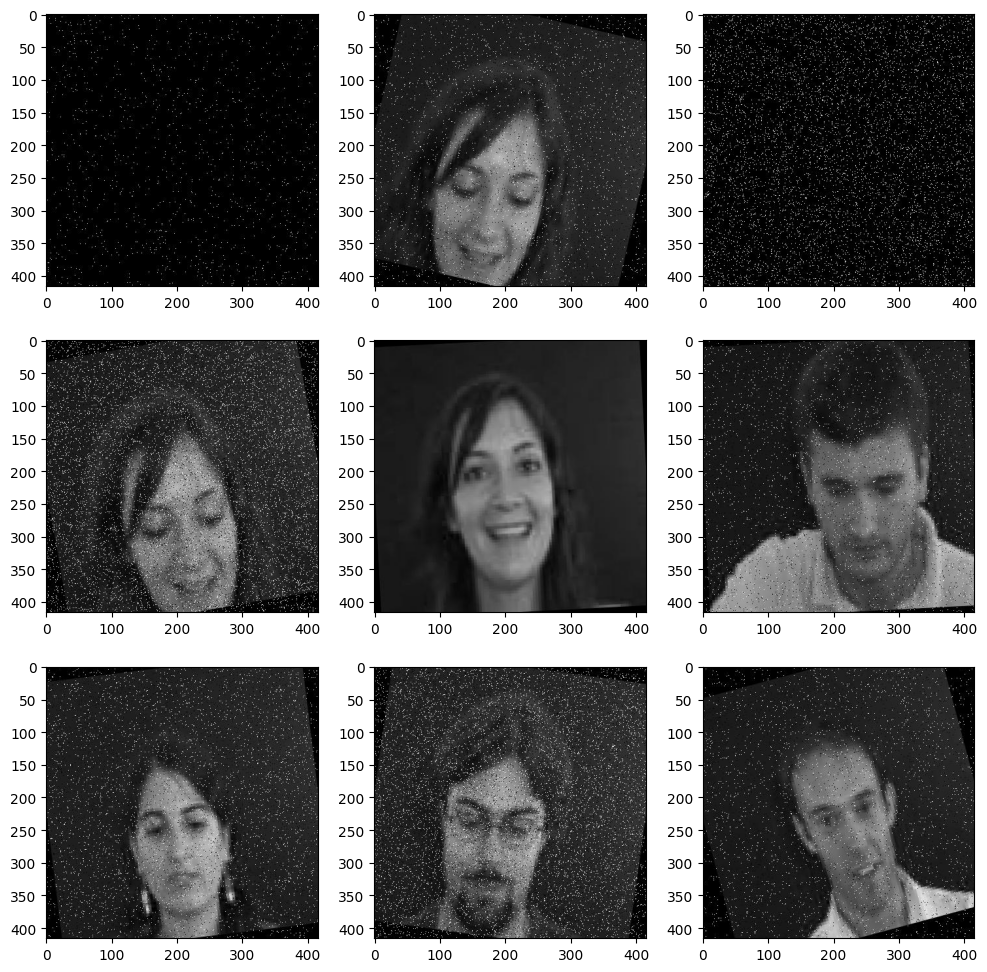

In [4]:
import cv2

expression = 'Happiness'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    
    img_path = folder_path + "train/" + expression + "/" + os.listdir(folder_path + "train/" + expression)[i]
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Umwandeln in das RGB-Format (falls erforderlich)
    plt.imshow(img)
    
plt.show()

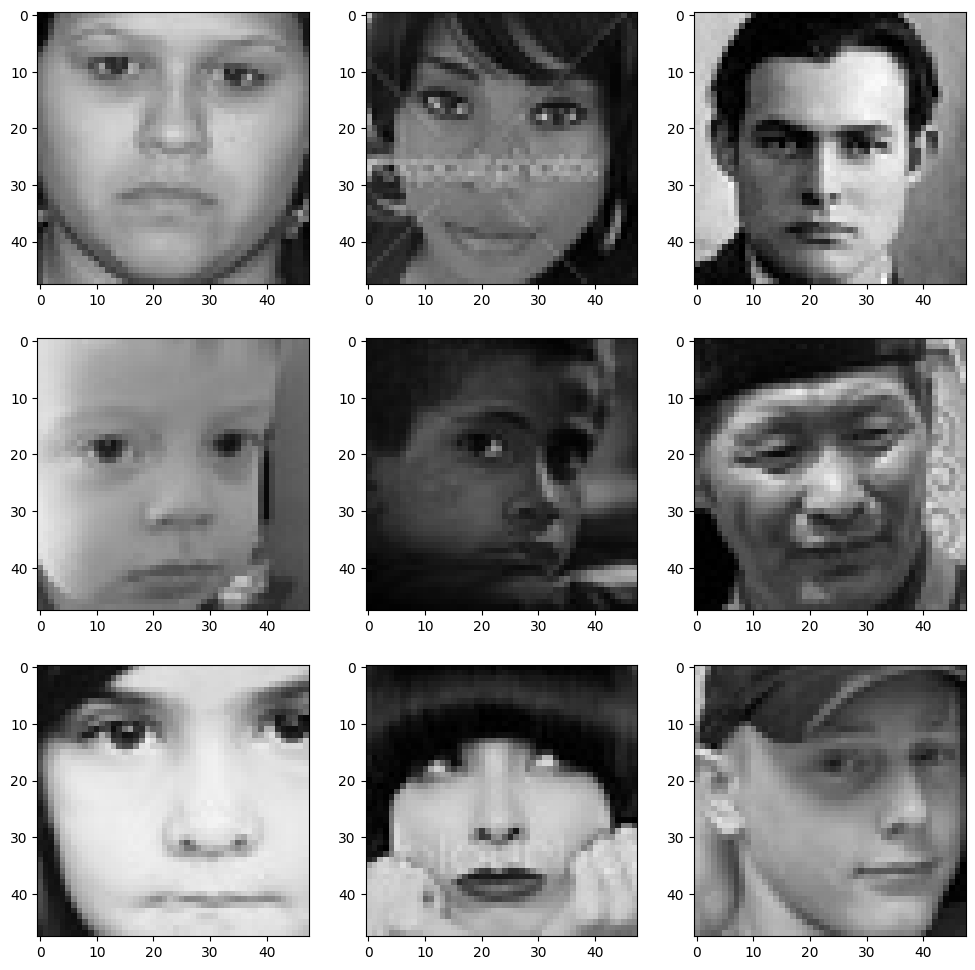

In [5]:
expression = 'neutral'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    
    img_path = folder_path + "train/" + expression + "/" + os.listdir(folder_path + "train/" + expression)[i]
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Umwandeln in das RGB-Format (falls erforderlich)
    plt.imshow(img)
    
plt.show()

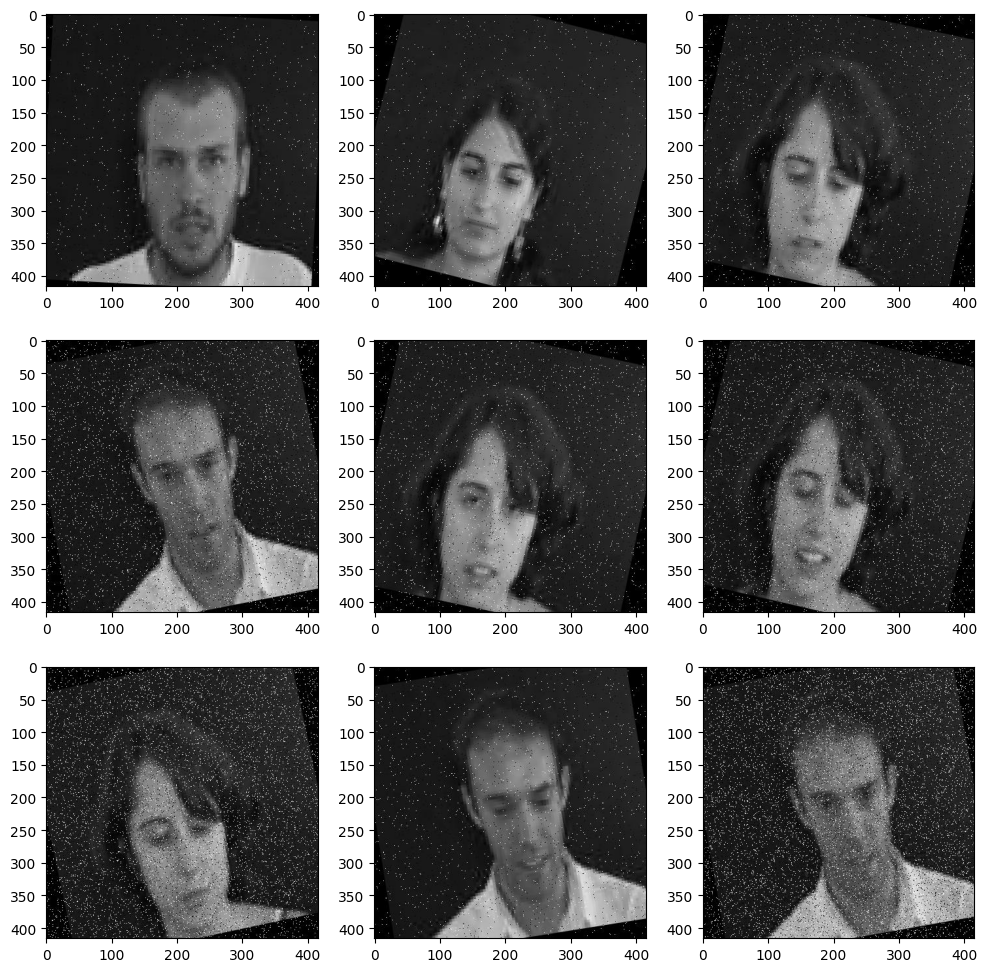

In [6]:
expression = 'Disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    
    img_path = folder_path + "train/" + expression + "/" + os.listdir(folder_path + "train/" + expression)[i]
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Umwandeln in das RGB-Format (falls erforderlich)
    plt.imshow(img)
    
plt.show()


# Making Training and Validation Data

In [7]:
import albumentations as A
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Verzeichnispfade
TRAIN_DIR = "C:/Users/janin/Documents/ZHAW_semester4/KI-Anwendungen/Abschlusspruefung/Frontend_Backend_Image_Classification/KI-Anwendungen-n-to-n-backend-mnist-classification/train"
TEST_DIR = "C:/Users/janin/Documents/ZHAW_semester4/KI-Anwendungen/Abschlusspruefung/Frontend_Backend_Image_Classification/KI-Anwendungen-n-to-n-backend-mnist-classification/test"
VALIDATION_DIR = "C:/Users/janin/Documents/ZHAW_semester4/KI-Anwendungen/Abschlusspruefung/Frontend_Backend_Image_Classification/KI-Anwendungen-n-to-n-backend-mnist-classification/validation"
BATCH_SIZE = 128
IMG_SIZE = (128, 128)

datagen_train = ImageDataGenerator()
datagen_val = ImageDataGenerator()

# Albumentations-Augmentierungen
augmentations = A.Compose([
    A.Resize(width=IMG_SIZE[0], height=IMG_SIZE[1]),
    A.ShiftScaleRotate(rotate_limit=15, p=0.5),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
])

train_set = datagen_train.flow_from_directory(TRAIN_DIR,
                                              target_size=(picture_size, picture_size),
                                              color_mode="grayscale",
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical",
                                              shuffle=True)

test_set = datagen_val.flow_from_directory(VALIDATION_DIR,
                                           target_size=(picture_size, picture_size),
                                           color_mode="grayscale",
                                           batch_size=BATCH_SIZE,
                                           class_mode="categorical",
                                           shuffle=False)


Found 40184 images belonging to 7 classes.
Found 29099 images belonging to 7 classes.


# Model Building

In [8]:
# Mein eigenes neurales Netzwerkmodell für Emotionsklassifizierung mit CNN-Schichten
# Schichten - um auf verschiedenen Ebenen des Bildes unterschiedlcihe Merkmale zu verfassen (durch Kombination aller Schichten können komplexe Muster /Strukturen im Bild erkannt werden)
no_of_classes=7 # Modell soll sieben Klassen erkennen (Emotionen)

model=Sequential() # lineare stabelung von Schichten, bei der jede Schicht der Reihe nach hinzugefügt wird

#1st CNN layer (ausführung der Faltungsvorgänge auf den Eingangsbildern) - 64 BIlder mit grösse 3x3
model.add(Conv2D(64,(3,3),padding="same",input_shape=(48,48,1))) # padding fügt Nullen an Rändern hinzu (Ausgangsgrösse = Einganbegröses)
model.add(BatchNormalization()) # macht Training stabiler
model.add(Activation("relu")) #entfernt negative Werte und aktiviert relevante Merkmale
model.add(MaxPooling2D(pool_size=(2,2))) # reduziert Dimensionalität 
model.add(Dropout(0.25)) # verhindert Overfitting (Dropout bei Wert von 0.25)


#2nd CNN layer (gleich wie erste Schicht, verwendet jedoch 128 Filter/Neuronen mit einer Grösse von 5x5)
model.add(Conv2D(128,(5,5),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#3rd CNN layer (gleich wie erste Schicht, verwendet jedoch 512 Filter/Neuronen mit einer Grösse von 3x3)
model.add(Conv2D(512,(3,3),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#4th CNN layer (gleich wie erste Schicht, verwendet jedoch 128 Filter/Neuronen mit einer Grösse von 5x5)
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Umwaldung in ein eindimensionaler Vektor (mit Flatten-Schicht)
model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256)) #besteht aus 256 Neuronen
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512)) # besteht aus 512 Neuronen
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Dense-Schicht => Ausgabe des Modells - wird mit Adam-Optimizer trainiert
model.add(Dense(no_of_classes,activation="softmax"))

# Adam-Optimizer => minimiert Verlustfunktion crossentropy
opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])

# Zusammenfassung des Modells anzeigen (anzahl Parameter und die Form der Ausgabegrössen für jede Schichtwas )
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

# Fitting the Model with Training and Validation Data

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Callbacks => ermöglichen es, das Verhalten des Trainingsprozesses anzupassen und das Modell kontrolliert anzupassen oder zu überwachen
checkpoint = ModelCheckpoint("./model_versuch_drei.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 15

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [10]:
# eigentliches Training des Modells
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

C:\Users\janin\AppData\Local\Temp\ipykernel_10040\3853974908.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


Epoch 1/15
313/313 [==============================] - ETA: 0s - loss: 1.8121 - accuracy: 0.2866WARNING:tensorflow:Can save best model only with val_acc available, skipping.


313/313 [==============================] - 1755s 6s/step - loss: 1.8121 - accuracy: 0.2866 - val_loss: 1.5791 - val_accuracy: 0.4125 - lr: 0.0010
Epoch 2/15
313/313 [==============================] - ETA: 0s - loss: 1.4613 - accuracy: 0.4279WARNING:tensorflow:Can save best model only with val_acc available, skipping.


313/313 [==============================] - 1226s 4s/step - loss: 1.4613 - accuracy: 0.4279 - val_loss: 1.2614 - val_accuracy: 0.5173 - lr: 0.0010
Epoch 3/15
313/313 [==============================] - ETA: 0s - loss: 1.2877 - accuracy: 0.4991WARNING:tensorflow:Can save best model only with val_acc available, skipping.


313/313 [==============================] - 1293s 4s/step - loss: 1.2877 - accuracy: 0.4991 - val_loss: 1.2472 - val_accuracy: 0.5164 - lr: 0.0010
Epoch 4/15
313/313 [==============================] - ETA: 0s - loss: 1.1804 - accuracy: 0.5446WARNING:tensorflow:Can save best model only with val_acc available, skipping.


313/313 [==============================] - 1241s 4s/step - loss: 1.1804 - accuracy: 0.5446 - val_loss: 1.0583 - val_accuracy: 0.6017 - lr: 0.0010
Epoch 5/15
313/313 [==============================] - ETA: 0s - loss: 1.0992 - accuracy: 0.5766WARNING:tensorflow:Can save best model only with val_acc available, skipping.


313/313 [==============================] - 1297s 4s/step - loss: 1.0992 - accuracy: 0.5766 - val_loss: 1.0394 - val_accuracy: 0.6017 - lr: 0.0010
Epoch 6/15
313/313 [==============================] - ETA: 0s - loss: 1.0329 - accuracy: 0.6071WARNING:tensorflow:Can save best model only with val_acc available, skipping.


313/313 [==============================] - 1266s 4s/step - loss: 1.0329 - accuracy: 0.6071 - val_loss: 0.9830 - val_accuracy: 0.6341 - lr: 0.0010
Epoch 7/15
313/313 [==============================] - ETA: 0s - loss: 0.9689 - accuracy: 0.6335WARNING:tensorflow:Can save best model only with val_acc available, skipping.


313/313 [==============================] - 1264s 4s/step - loss: 0.9689 - accuracy: 0.6335 - val_loss: 0.9637 - val_accuracy: 0.6372 - lr: 0.0010
Epoch 8/15
313/313 [==============================] - ETA: 0s - loss: 0.9138 - accuracy: 0.6558WARNING:tensorflow:Can save best model only with val_acc available, skipping.


313/313 [==============================] - 1267s 4s/step - loss: 0.9138 - accuracy: 0.6558 - val_loss: 0.8906 - val_accuracy: 0.6641 - lr: 0.0010
Epoch 9/15
313/313 [==============================] - ETA: 0s - loss: 0.8652 - accuracy: 0.6752WARNING:tensorflow:Can save best model only with val_acc available, skipping.


313/313 [==============================] - 1231s 4s/step - loss: 0.8652 - accuracy: 0.6752 - val_loss: 0.9745 - val_accuracy: 0.6357 - lr: 0.0010
Epoch 10/15
313/313 [==============================] - ETA: 0s - loss: 0.8108 - accuracy: 0.6942WARNING:tensorflow:Can save best model only with val_acc available, skipping.


313/313 [==============================] - 1300s 4s/step - loss: 0.8108 - accuracy: 0.6942 - val_loss: 0.7466 - val_accuracy: 0.7300 - lr: 0.0010
Epoch 11/15
313/313 [==============================] - ETA: 0s - loss: 0.7626 - accuracy: 0.7162WARNING:tensorflow:Can save best model only with val_acc available, skipping.


313/313 [==============================] - 1194s 4s/step - loss: 0.7626 - accuracy: 0.7162 - val_loss: 0.6494 - val_accuracy: 0.7721 - lr: 0.0010
Epoch 12/15
313/313 [==============================] - ETA: 0s - loss: 0.7169 - accuracy: 0.7354WARNING:tensorflow:Can save best model only with val_acc available, skipping.


313/313 [==============================] - 1238s 4s/step - loss: 0.7169 - accuracy: 0.7354 - val_loss: 0.5852 - val_accuracy: 0.7960 - lr: 0.0010
Epoch 13/15
313/313 [==============================] - ETA: 0s - loss: 0.6709 - accuracy: 0.7512WARNING:tensorflow:Can save best model only with val_acc available, skipping.


313/313 [==============================] - 1662s 5s/step - loss: 0.6709 - accuracy: 0.7512 - val_loss: 0.5560 - val_accuracy: 0.8053 - lr: 0.0010
Epoch 14/15
313/313 [==============================] - ETA: 0s - loss: 0.6326 - accuracy: 0.7642WARNING:tensorflow:Can save best model only with val_acc available, skipping.


313/313 [==============================] - 2344s 7s/step - loss: 0.6326 - accuracy: 0.7642 - val_loss: 0.5085 - val_accuracy: 0.8248 - lr: 0.0010
Epoch 15/15
313/313 [==============================] - ETA: 0s - loss: 0.5866 - accuracy: 0.7838WARNING:tensorflow:Can save best model only with val_acc available, skipping.


313/313 [==============================] - 1542s 5s/step - loss: 0.5866 - accuracy: 0.7838 - val_loss: 0.4449 - val_accuracy: 0.8539 - lr: 0.0010


In [15]:
# Saving a Keras model (für Hugging Face):
model.save('hfmodel_versuch_vier/mobilenetv3-imagenet')

INFO:tensorflow:Assets written to: hfmodel_versuch_vier/mobilenetv3-imagenet\assets


INFO:tensorflow:Assets written to: hfmodel_versuch_vier/mobilenetv3-imagenet\assets


In [16]:
# normales Speichern
model.save_weights('emotionmodel3_backup.h5')

# Plotting Accuracy & Loss

In [19]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Ausgabe der Accuracy-Werte
print("Accuracy:")
print("Train:", accuracy)
print("Validation:", val_accuracy)

# Ausgabe der Loss-Werte
print("Loss:")
print("Train:", loss)
print("Validation:", val_loss)


Accuracy:
Train: [0.2865987718105316, 0.4279259145259857, 0.49907630681991577, 0.5445626378059387, 0.5765678286552429, 0.6071000695228577, 0.6335380673408508, 0.6558318138122559, 0.6752296686172485, 0.6941531896591187, 0.7162472605705261, 0.7353704571723938, 0.7512482404708862, 0.7641801238059998, 0.7837777137756348]
Validation: [0.4125481843948364, 0.5173113942146301, 0.5164165496826172, 0.601665735244751, 0.6017345786094666, 0.6340858936309814, 0.6372177600860596, 0.6640968918800354, 0.6357378959655762, 0.7299697399139404, 0.7720608711242676, 0.7960146069526672, 0.8053414225578308, 0.8247522115707397, 0.8538683652877808]
Loss:
Train: [1.8121485710144043, 1.4613230228424072, 1.2877031564712524, 1.180388331413269, 1.0991991758346558, 1.0329220294952393, 0.9688994884490967, 0.9137528538703918, 0.8651576042175293, 0.810777485370636, 0.7626219987869263, 0.7168626189231873, 0.6708799600601196, 0.6326338648796082, 0.5865634083747864]
Validation: [1.5790886878967285, 1.261362910270691, 1.247

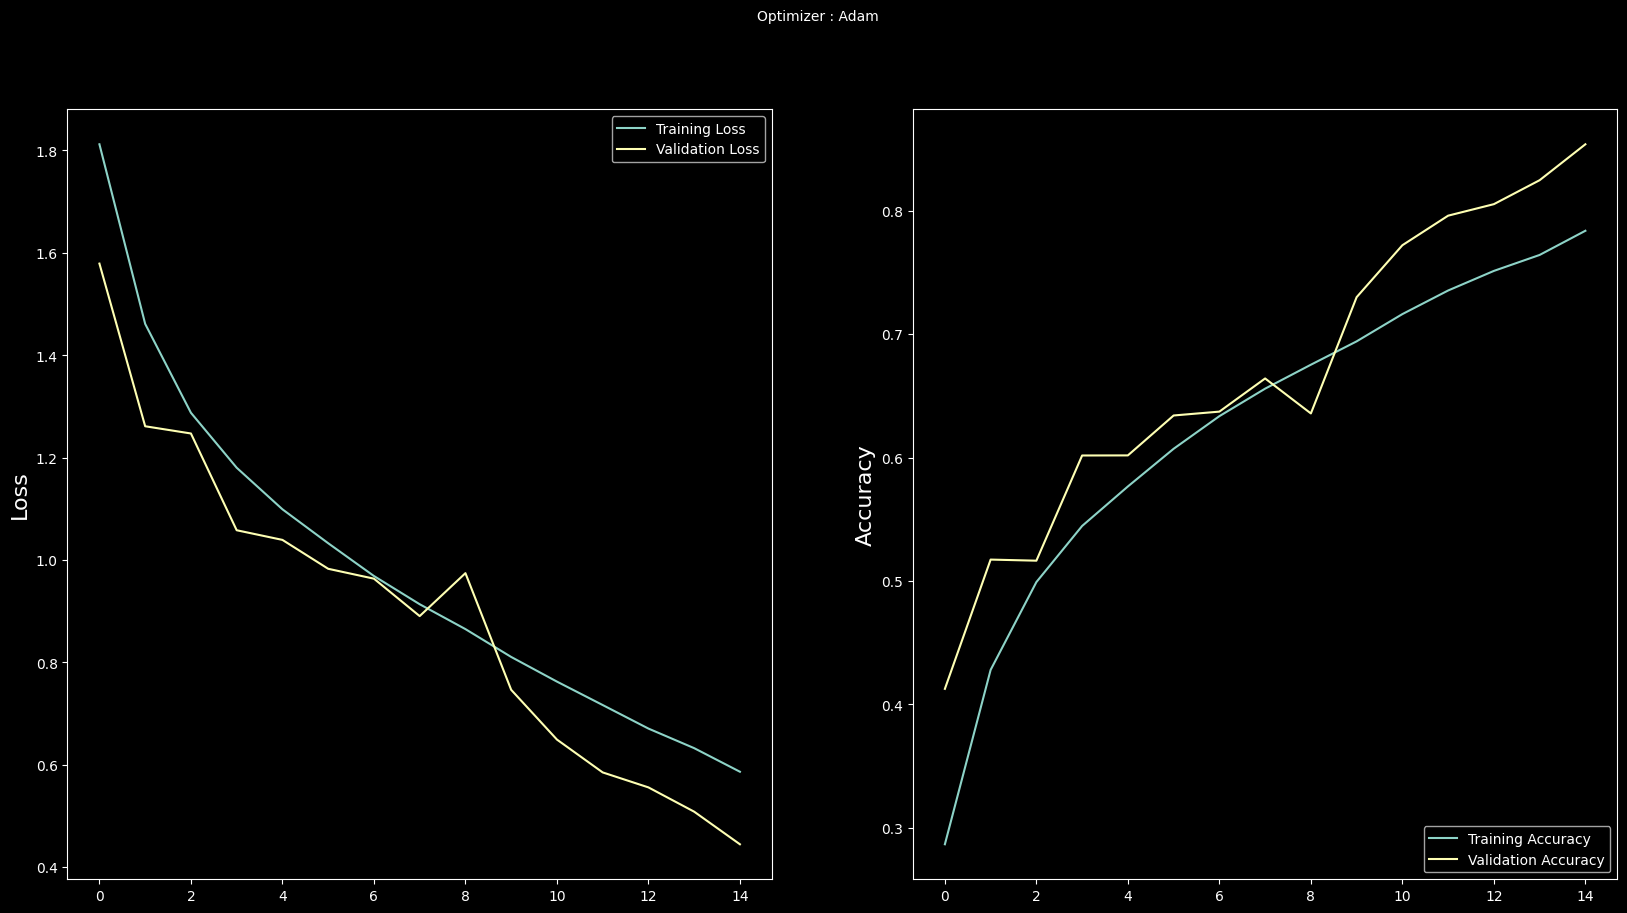

In [17]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Footer Info

In [18]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2023-06-25 22:06:36
Python Version: 3.9.16
-----------------------------------
